# **🚦 Project Title: Reinforcement Learning for Traffic Signal Control 🚗**

## Problem Description 🛑

* Managing traffic flow efficiently in urban environments is a significant challenge. 🚥

* The typical traffic light systems are often fixed and do not adapt to real-time traffic conditions, which can lead to:

🚗 Traffic congestion: Long queues of cars waiting at intersections.

🕒 Increased wait times: Drivers have to wait for long periods, regardless of the actual traffic flow.

🌍 Environmental impact: Idle vehicles waste fuel, contributing to air pollution.

# **Solution** 💡

* Use Reinforcement Learning (RL) to control traffic signals based on real-time traffic conditions:

* Custom Environment: Simulates a 4-lane intersection with varying traffic queues.

* RL Agent (PPO): Trained to decide when to turn the signal Green for each lane.

* Reward System: Agent receives rewards for clearing queues and penalties for congestion.

In [ ]:
# Step 1: Install necessary dependencies
# In a true Sutskever-inspired way, we focus on minimal overhead.
!pip install stable-baselines3[extra] gym numpy
!pip install 'shimmy>=2.0'

!pip install streamlit
!curl -sSL https://ngrok-agent.s3.amazonaws.com/ngrok.asc \
	| sudo tee /etc/apt/trusted.gpg.d/ngrok.asc >/dev/null \
	&& echo "deb https://ngrok-agent.s3.amazonaws.com buster main" \
	| sudo tee /etc/apt/sources.list.d/ngrok.list \
	&& sudo apt update \
	&& sudo apt install ngrok

!pip install httpx==0.27.2 pyngrok

### **Initializing traffic simulation environment**

In [6]:
# Step 2: Define the Environment — A Simplistic Traffic System
# Here we model the environment where traffic signals (agents) operate in isolation,
# optimizing for throughput independently. There’s no coordination between agents,
# mimicking a decentralized system where the emergence of intelligence takes time.

import gym
from gym import spaces
import numpy as np

class SimpleTrafficEnv(gym.Env):
    """
    Environment where each agent (traffic light) controls a single intersection.
    Agents learn to manage traffic flow without explicit coordination, resulting
    in emergent global behavior across the system.
    """
    def __init__(self):
        super(SimpleTrafficEnv, self).__init__()
        self.action_space = spaces.Discrete(2)  # 0 = Red, 1 = Green
        self.observation_space = spaces.Box(low=0, high=100, shape=(4,), dtype=np.int32)  # 4 lanes
        self.reset()

    def reset(self):
        """
        Reset the environment with random traffic queues for each intersection.
        This mimics a traffic signal system being initialized at a random time.
        """
        self.queues = np.random.randint(0, 50, size=(4,))
        return self.queues

    def step(self, action):
        """
        Take an action (Red or Green light), calculate reward, and return the next state.
        The reward comes from clearing as many vehicles as possible during green light.

        Emergent behaviors arise as agents interact with the dynamic environment.
        """
        reward = 0
        if action == 1:  # Green Light: clear some cars
            cleared = np.minimum(self.queues, [10, 10, 10, 10])
            self.queues -= cleared
            reward = np.sum(cleared)
        else:  # Red Light: add some cars to the queue
            self.queues += np.random.randint(0, 5, size=(4,))
        done = np.any(self.queues > 100)
        return self.queues, reward, done, {}


### Train the RL Model

* Train the Reinforcement Learning (RL) Model

* In this step, we train a PPO model using the custom traffic simulation environment to learn how to control the traffic lights.
python

In [7]:
# Step 3: Initialize Environment and Model — Decentralized Training
# Each agent optimizes locally with no central controller, mimicking a decentralized approach.

from stable_baselines3 import PPO

# Initialize environment and PPO agent, opting for GPU acceleration for faster learning.
env = SimpleTrafficEnv()
model = PPO("MlpPolicy", env, verbose=1, device="cuda")  # Using GPU for faster training

# Train the model for 10,000 timesteps — learning is local and decentralized.
model.learn(total_timesteps=10000)

# Save the model after training for later use
model.save("traffic_model")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


-----------------------------
| time/              |      |
|    fps             | 504  |
|    iterations      | 1    |
|    time_elapsed    | 4    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 439         |
|    iterations           | 2           |
|    time_elapsed         | 9           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010758452 |
|    clip_fraction        | 0.133       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.685      |
|    explained_variance   | -0.00864    |
|    learning_rate        | 0.0003      |
|    loss                 | 1.63e+03    |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.015      |
|    value_loss           | 3.92e+03    |
-----------------------------------------
----------------------------------

### Load the Model and Test Predictions

* This cell loads the trained model and tests it with a random observation (queue state) to predict the next action (Green/Red light).
python

In [8]:
# Step 4: Evaluation — Seeing the Emergent Intelligence
# After training, let's evaluate how well the agent has learned to manage traffic.

model = PPO.load("traffic_model")
env = SimpleTrafficEnv()

obs = env.reset()
total_reward = 0

for _ in range(100):
    action, _states = model.predict(obs)
    obs, reward, done, _ = env.step(action)
    total_reward += reward
    if done:
        break

print(f"Total reward from the evaluation: {total_reward}")

# Step 5: Visualization - Optional for deeper insights
# This step isn't necessary for basic functionality but helps in understanding the learned behavior.
# You could create visualizations (e.g., with `matplotlib`) for plotting agent behavior or traffic flow.


Total reward from the evaluation: 595


In [16]:
# Load the trained model
model = PPO.load("/content/traffic_model")

# Test with random observations (queues)
queues = np.random.randint(0, 50, size=(4,))
action, _states = model.predict(queues)

action_str = "Green" if action == 1 else "Red"
print(f"Traffic signal action: {action_str}")


Traffic signal action: Green


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


### Simulate traffic light actions
* This cell runs the simulation for a specified number of steps, predicting the traffic light actions (Green/Red) at each step, and visualizing the queues.
python

In [17]:
# Simulate traffic light actions
def simulate_traffic(steps=5):
    env = SimpleTrafficEnv()
    for _ in range(steps):
        obs = env.reset()
        print(f"Initial queues: {obs}")
        for _ in range(10):  # Simulate 10 timesteps
            action, _states = model.predict(obs)
            action_str = "Green" if action == 1 else "Red"
            print(f"Action: {action_str} | Queues: {obs}")
            obs, reward, done, info = env.step(action)
            if done:
                break
simulate_traffic()


Initial queues: [35 27 22 19]
Action: Red | Queues: [35 27 22 19]
Action: Green | Queues: [36 28 24 21]
Action: Red | Queues: [26 18 14 11]
Action: Red | Queues: [28 18 15 13]
Action: Red | Queues: [28 22 16 16]
Action: Green | Queues: [32 25 18 18]
Action: Red | Queues: [22 15  8  8]
Action: Red | Queues: [25 19 11 10]
Action: Green | Queues: [26 21 11 12]
Action: Red | Queues: [16 11  1  2]
Initial queues: [42 10 35  0]
Action: Red | Queues: [42 10 35  0]
Action: Green | Queues: [46 10 39  3]
Action: Green | Queues: [36  0 29  0]
Action: Red | Queues: [26  0 19  0]
Action: Red | Queues: [26  2 19  1]
Action: Red | Queues: [30  4 22  4]
Action: Red | Queues: [32  6 22  4]
Action: Green | Queues: [36  7 26  7]
Action: Red | Queues: [26  0 16  0]
Action: Green | Queues: [29  2 19  3]
Initial queues: [20 40 25 20]
Action: Green | Queues: [20 40 25 20]
Action: Red | Queues: [10 30 15 10]
Action: Green | Queues: [11 33 16 14]
Action: Green | Queues: [ 1 23  6  4]
Action: Red | Queues: [ 0 

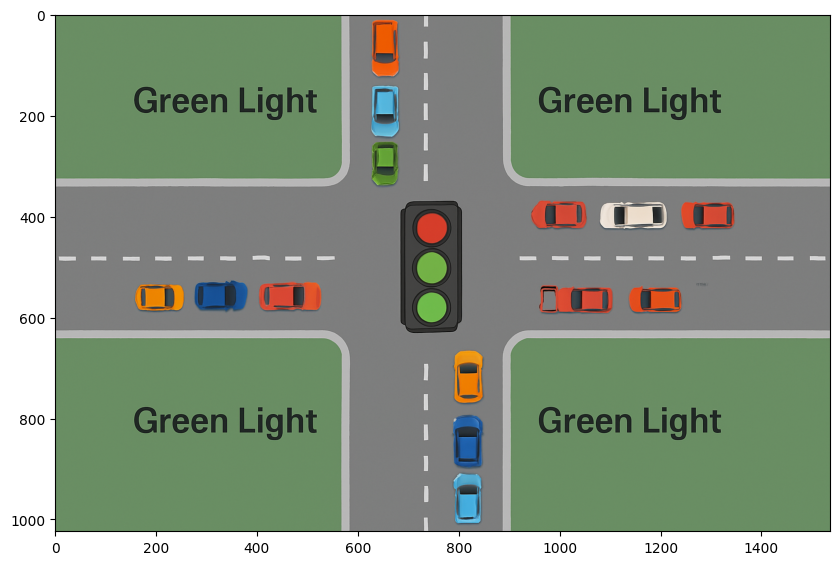

In [19]:
# Plotting the image with annotated lanes
import matplotlib.pyplot as plt
import matplotlib.patches as patches

img = plt.imread('/content/ChatGPT Image Apr 13, 2025, 09_58_03 AM.png')
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(img)

# Annotate the green lanes (For example, Lane 1 and Lane 3 turn green)
green_lanes = [1, 3]  # Indexing starts from 1
for lane in green_lanes:
    rect = patches.Rectangle((0.1 * lane, 0.3), 0.1, 0.2, linewidth=2, edgecolor='green', facecolor='green', alpha=0.5)
    ax.add_patch(rect)

plt.show()


### Perform testing with Streamlit UI

In [13]:
!ngrok config add-authtoken 2hRCVqGMh9oEWyUpzlomgsuiLE0_5fxE5inRWSK9MfR1xFcR7

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [12]:
%%writefile traffic_agent.py

import streamlit as st
import numpy as np
from stable_baselines3 import PPO

# Load the trained model
model = PPO.load("traffic_model")

st.title("Traffic Signal RL Agent")

# Create inputs for the traffic queues (4 lanes)
queues = []
for i in range(1, 5):
    queues.append(st.slider(f"Lane {i} Queue", 0, 100, 50))

# Predict action
if st.button('Predict Traffic Signal Action'):
    action, _states = model.predict(np.array(queues))
    action_str = "Green" if action == 1 else "Red"
    st.write(f"Action: {action_str}")


Writing traffic_agent.py


In [14]:
from pyngrok import ngrok
import subprocess
import time

# Kill any prior processes
!pkill streamlit
!pkill ngrok

In [15]:

# # Start Streamlit app
public_url = ngrok.connect(8501, "http")
print(f"Access your Streamlit App here: {public_url}")

# Run Streamlit in background
process = subprocess.Popen(["streamlit", "run", "traffic_agent.py"])

# # Keep Streamlit alive
time.sleep(5)


Access your Streamlit App here: NgrokTunnel: "https://ab19-34-105-69-133.ngrok-free.app" -> "http://localhost:8501"
